In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics


In [2]:
df=pd.read_csv("customer_churn.csv")

In [3]:
df

,CHURN,Gender,Status,Children,Est Income,Car Owner,Age,LongDistance,International,Local,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,Usage,RatePlan
0,T,F,S,1.0,38000.00,N,24.393333,23.56,0.00,206.08,0.0,CC,Budget,Intnl_discount,229.64,3.0
1,F,M,M,2.0,29616.00,N,49.426667,29.78,0.00,45.50,0.0,CH,FreeLocal,Standard,75.29,2.0
2,F,M,M,0.0,19732.80,N,50.673333,24.81,0.00,22.44,0.0,CC,FreeLocal,Standard,47.25,3.0
3,F,M,S,2.0,96.33,N,56.473333,26.13,0.00,32.88,1.0,CC,Budget,Standard,59.01,1.0
4,F,F,M,2.0,52004.80,N,25.140000,5.03,0.00,23.11,0.0,CH,Budget,Intnl_discount,28.14,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,T,F,S,0.0,78851.30,N,48.373333,0.37,0.00,28.66,0.0,CC,FreeLocal,Standard,29.04,4.0
2062,T,F,S,1.0,17540.70,Y,62.786667,22.17,0.57,13.45,0.0,Auto,Budget,Standard,36.20,1.0
2063,T,F,M,0.0,83891.90,Y,61.020000,28.92,0.00,45.47,0.0,CH,Budget,Standard,74.40,4.0
2064,T,F,M,2.0,28220.80,N,38.766667,26.49,0.00,12.46,0.0,CC,FreeLocal,Standard,38.95,4.0


In [4]:
df.head()

,CHURN,Gender,Status,Children,Est Income,Car Owner,Age,LongDistance,International,Local,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,Usage,RatePlan
0,T,F,S,1.0,38000.00,N,24.393333,23.56,0.0,206.08,0.0,CC,Budget,Intnl_discount,229.64,3.0
1,F,M,M,2.0,29616.00,N,49.426667,29.78,0.0,45.50,0.0,CH,FreeLocal,Standard,75.29,2.0
2,F,M,M,0.0,19732.80,N,50.673333,24.81,0.0,22.44,0.0,CC,FreeLocal,Standard,47.25,3.0
3,F,M,S,2.0,96.33,N,56.473333,26.13,0.0,32.88,1.0,CC,Budget,Standard,59.01,1.0
4,F,F,M,2.0,52004.80,N,25.140000,5.03,0.0,23.11,0.0,CH,Budget,Intnl_discount,28.14,1.0


In [5]:
df.columns

Index(['CHURN', 'Gender', 'Status', 'Children', 'Est Income', 'Car Owner',
       'Age', 'LongDistance', 'International', 'Local', 'Dropped', 'Paymethod',
       'LocalBilltype', 'LongDistanceBilltype', 'Usage', 'RatePlan'],
      dtype='object')

In [6]:
df.shape

(2066, 16)

In [7]:
df.describe()

,Children,Est Income,Age,LongDistance,International,Local,Dropped,Usage,RatePlan
count,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000
mean,1.146176,51514.070465,42.783982,16.122076,1.191104,59.158025,0.136012,75.907696,2.510649
std,0.843105,30805.652721,14.894693,9.874795,2.602010,57.571428,0.526665,59.787475,1.124731
min,0.000000,96.330000,12.326667,0.000000,0.000000,0.680000,0.000000,0.680000,1.000000
25%,0.000000,21021.600000,30.356667,8.090000,0.000000,15.177500,0.000000,34.190000,2.000000
50%,1.000000,55860.000000,45.526667,16.140000,0.000000,39.845000,0.000000,57.110000,2.000000
75%,2.000000,78000.000000,54.013333,22.990000,0.000000,87.460000,0.000000,107.020000,4.000000
max,2.000000,120000.000000,77.000000,59.000000,9.700000,332.460000,4.000000,361.880000,4.000000


In [8]:
df.isnull()

,CHURN,Gender,Status,Children,Est Income,Car Owner,Age,LongDistance,International,Local,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,Usage,RatePlan
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2062,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2063,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2064,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

CHURN                   0
Gender                  0
Status                  0
Children                0
Est Income              0
Car Owner               0
Age                     0
LongDistance            0
International           0
Local                   0
Dropped                 0
Paymethod               0
LocalBilltype           0
LongDistanceBilltype    0
Usage                   0
RatePlan                0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CHURN                 2066 non-null   object 
 1   Gender                2066 non-null   object 
 2   Status                2066 non-null   object 
 3   Children              2066 non-null   float64
 4   Est Income            2066 non-null   float64
 5   Car Owner             2066 non-null   object 
 6   Age                   2066 non-null   float64
 7   LongDistance          2066 non-null   float64
 8   International         2066 non-null   float64
 9   Local                 2066 non-null   float64
 10  Dropped               2066 non-null   float64
 11  Paymethod             2066 non-null   object 
 12  LocalBilltype         2066 non-null   object 
 13  LongDistanceBilltype  2066 non-null   object 
 14  Usage                 2066 non-null   float64
 15  RatePlan             

In [11]:
df[df.duplicated()]

,CHURN,Gender,Status,Children,Est Income,Car Owner,Age,LongDistance,International,Local,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,Usage,RatePlan
281,F,F,M,2.0,52004.80,N,25.140000,5.03,0.00,23.11,0.0,CH,Budget,Intnl_discount,28.14,1.0
282,F,M,M,2.0,53010.80,N,18.840000,12.45,0.00,46.42,4.0,CC,FreeLocal,Standard,58.87,1.0
286,F,M,M,2.0,20078.00,N,32.846667,9.65,0.00,6.33,0.0,CC,Budget,Intnl_discount,15.98,4.0
288,T,M,M,1.0,7545.96,Y,16.753333,22.39,0.00,178.36,0.0,CC,Budget,Standard,200.75,3.0
289,T,F,S,0.0,78851.30,N,48.373333,0.37,0.00,28.66,0.0,CC,FreeLocal,Standard,29.04,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,F,M,S,2.0,96.33,N,56.473333,26.13,0.00,32.88,1.0,CC,Budget,Standard,59.01,1.0
2061,T,F,S,0.0,78851.30,N,48.373333,0.37,0.00,28.66,0.0,CC,FreeLocal,Standard,29.04,4.0
2062,T,F,S,1.0,17540.70,Y,62.786667,22.17,0.57,13.45,0.0,Auto,Budget,Standard,36.20,1.0
2063,T,F,M,0.0,83891.90,Y,61.020000,28.92,0.00,45.47,0.0,CH,Budget,Standard,74.40,4.0


In [12]:
df.drop_duplicates(keep="first",inplace=True)

In [13]:
print("number of rows are",df.shape[0],"and number of columns are",df.shape[1])

number of rows are 1202 and number of columns are 16


In [14]:
df.describe()

,Children,Est Income,Age,LongDistance,International,Local,Dropped,Usage,RatePlan
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,1.046589,52364.506073,43.579029,16.508037,1.109684,60.546339,0.147255,77.153295,2.516639
std,0.846893,30695.534271,14.551556,10.343730,2.526651,59.500482,0.554248,61.782203,1.110156
min,0.000000,96.330000,12.326667,0.000000,0.000000,0.680000,0.000000,0.680000,1.000000
25%,0.000000,23464.000000,33.000000,8.090000,0.000000,15.177500,0.000000,34.250000,2.000000
50%,1.000000,56454.900000,46.000000,16.200000,0.000000,40.070000,0.000000,57.170000,2.000000
75%,2.000000,78280.125000,54.013333,23.560000,0.000000,90.180000,0.000000,108.300000,4.000000
max,2.000000,120000.000000,77.000000,59.000000,9.700000,332.460000,4.000000,361.880000,4.000000


In [15]:
df.corr()

,Children,Est Income,Age,LongDistance,International,Local,Dropped,Usage,RatePlan
Children,1.000000,-0.172308,-0.064337,0.016263,-0.093397,-0.012877,-0.053653,-0.010610,0.009802
Est Income,-0.172308,1.000000,0.185035,-0.145922,0.038821,-0.080829,0.063197,-0.086469,0.010559
Age,-0.064337,0.185035,1.000000,-0.172924,-0.144888,-0.081686,0.019157,-0.083993,0.038973
LongDistance,0.016263,-0.145922,-0.172924,1.000000,-0.117467,0.261041,0.027101,0.360157,0.035377
International,-0.093397,0.038821,-0.144888,-0.117467,1.000000,-0.002383,-0.019065,0.027972,0.017551
Local,-0.012877,-0.080829,-0.081686,0.261041,-0.002383,1.000000,0.078511,0.988976,-0.003411
Dropped,-0.053653,0.063197,0.019157,0.027101,-0.019065,0.078511,1.000000,0.083733,0.011577
Usage,-0.010610,-0.086469,-0.083993,0.360157,0.027972,0.988976,0.083733,1.000000,0.003068
RatePlan,0.009802,0.010559,0.038973,0.035377,0.017551,-0.003411,0.011577,0.003068,1.000000


In [16]:
x=(df.Age.value_counts())

number of people having Age as 1 are {x[0]}and number of people having Age as 0 are{x[1]}


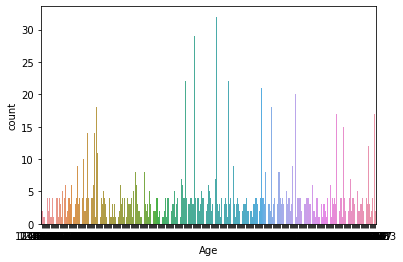

In [17]:
print("number of people having Age as 1 are {x[0]}and number of people having Age as 0 are{x[1]}")
p = sns.countplot (data=df,x="Age")
plt.show()

2.0    460
0.0    404
1.0    338
Name: Children, dtype: int64


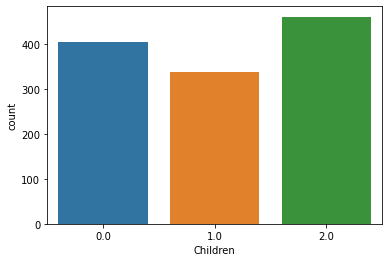

In [18]:
x=(df.Children.value_counts())
print(x)
p = sns.countplot(data=df,x="Children")

In [19]:
x=(df.LongDistance.value_counts())

In [20]:
print(x)

0.00     42
2.00     14
6.08     12
16.14    11
13.72    11
         ..
1.46      1
12.56     1
21.52     1
19.77     1
5.52      1
Name: LongDistance, Length: 311, dtype: int64


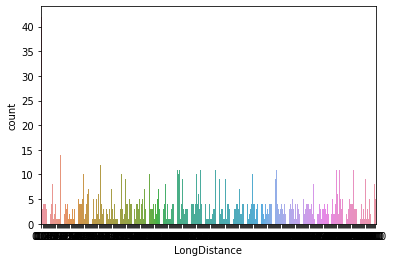

In [21]:
p=sns.countplot(data=df,x="LongDistance")

0.00     42
2.00     14
6.08     12
16.14    11
13.72    11
         ..
1.46      1
12.56     1
21.52     1
19.77     1
5.52      1
Name: LongDistance, Length: 311, dtype: int64


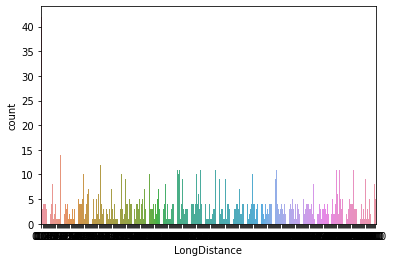

In [22]:
x = (df.LongDistance.value_counts())
print(x)
p = sns.countplot(data=df,x="LongDistance")

0.00    945
3.73     10
7.66      8
2.22      8
0.86      8
       ... 
6.29      1
8.91      1
8.95      1
1.96      1
9.69      1
Name: International, Length: 86, dtype: int64


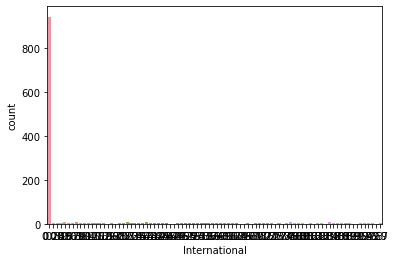

In [23]:
x = (df.International.value_counts())
print(x)
p = sns.countplot(data=df,x="International")
plt.show()

206.08    11
11.65     11
8.76      11
60.35     11
90.18     11
          ..
311.29     1
196.22     1
26.01      1
25.26      1
17.42      1
Name: Local, Length: 322, dtype: int64


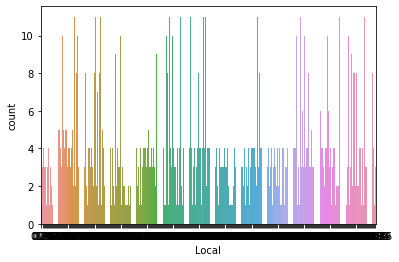

In [24]:
x = (df.Local.value_counts())
print(x)
p = sns.countplot(data = df,x="Local")
plt.show()

0.0    1086
1.0      88
4.0      15
2.0      10
3.0       3
Name: Dropped, dtype: int64


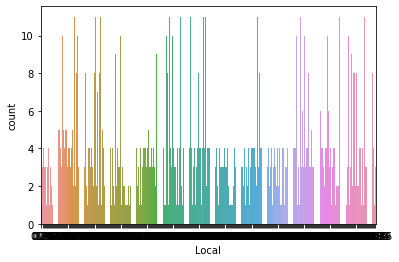

In [25]:
x = (df.Dropped.value_counts())
print(x)
p = sns.countplot(data = df,x="Local")
plt.show()

229.64    11
142.70    11
119.82    11
25.38     11
57.11     11
          ..
203.67     1
51.83      1
0.68       1
2.83       1
134.67     1
Name: Usage, Length: 327, dtype: int64


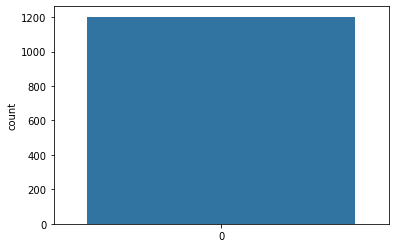

In [26]:
x = (df.Usage.value_counts())
print(x)
p=sns.countplot(data=df.Usage)

2.0    337
4.0    312
1.0    278
3.0    275
Name: RatePlan, dtype: int64


<AxesSubplot:xlabel='RatePlan', ylabel='count'>

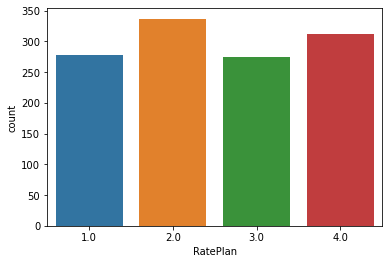

In [27]:
x= (df.RatePlan.value_counts())
print(x)
sns.countplot(data=df,x="RatePlan")

<Figure size 1440x1440 with 0 Axes>

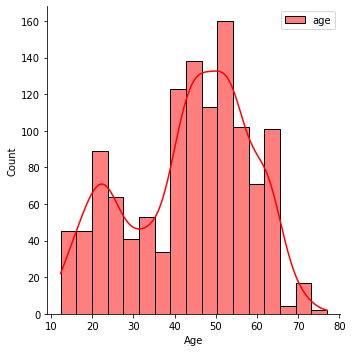

In [28]:
plt.figure(figsize=(20,20))
sns.displot(df.Age,color="red",label="age",kde=True)
plt.legend()

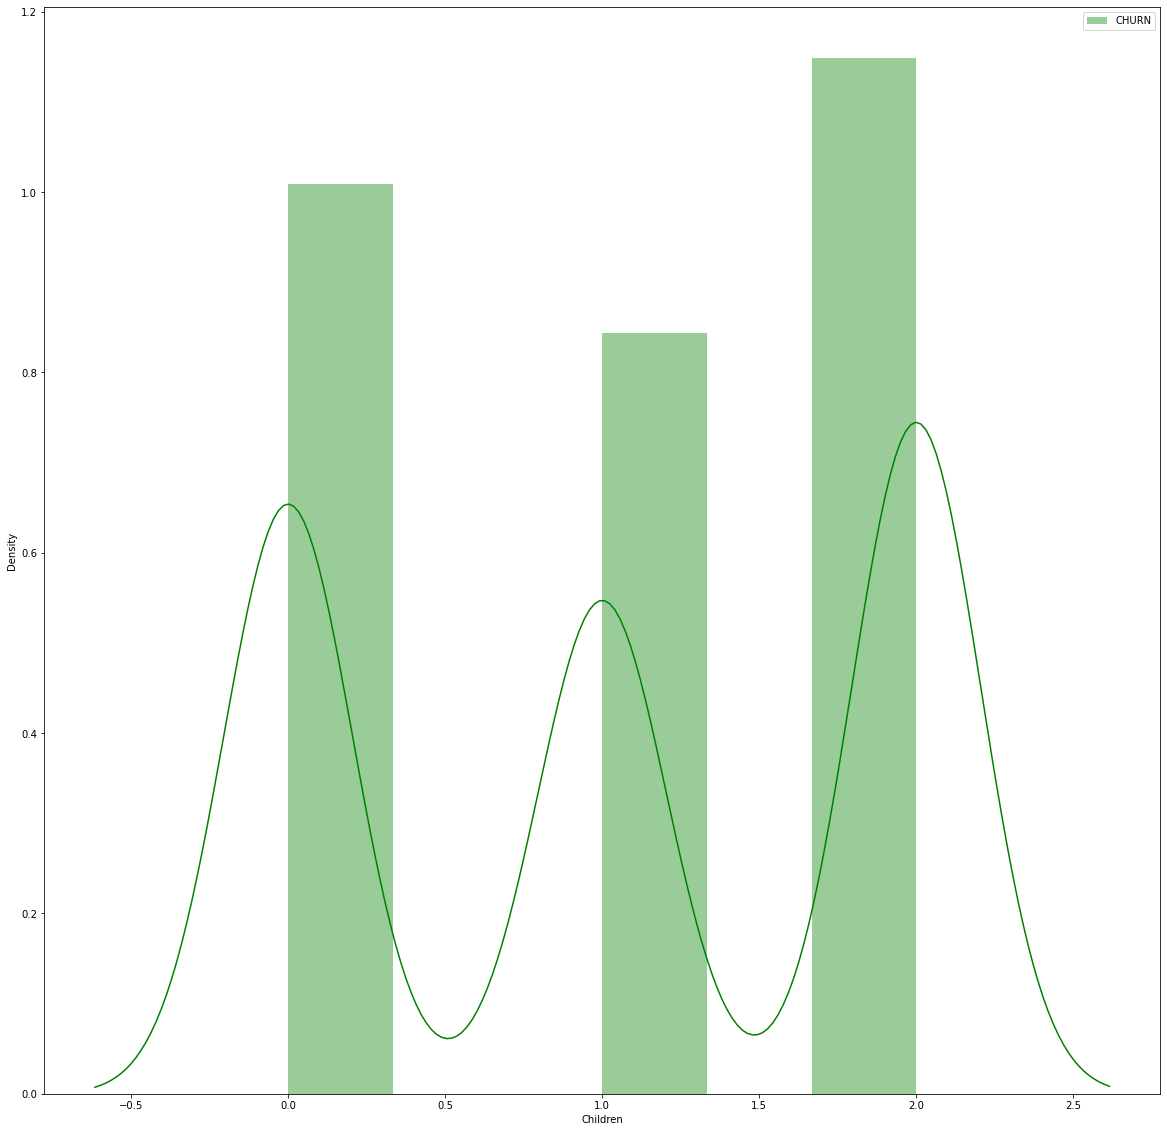

In [29]:
plt.figure(figsize=(20,20))
sns.distplot(df.Children,color="green",label="CHURN",kde=True)
plt.legend()

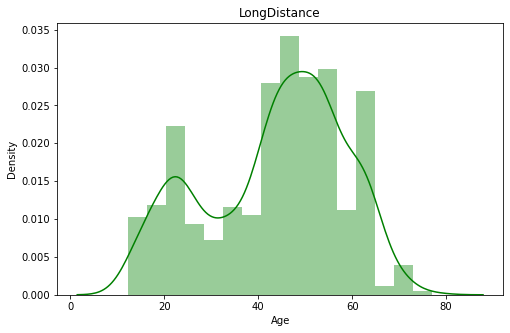

In [30]:
plt.figure(figsize=(8,5))
sns.distplot(df[df['Dropped']==0]["Age"],color = "green",kde=True)
plt.title("LongDistance")
plt.show()

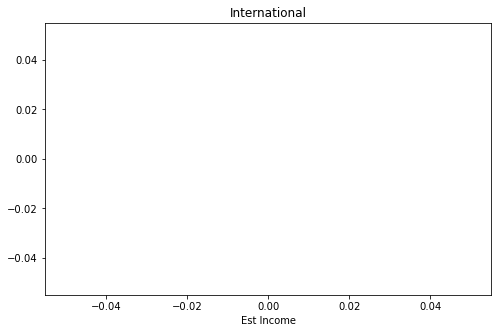

In [31]:
plt.figure(figsize=(8,5))
sns.distplot(df[df['Local']==0]["Est Income"],color = "green",kde=True)
plt.title("International")
plt.show()

<Figure size 1440x1440 with 0 Axes>

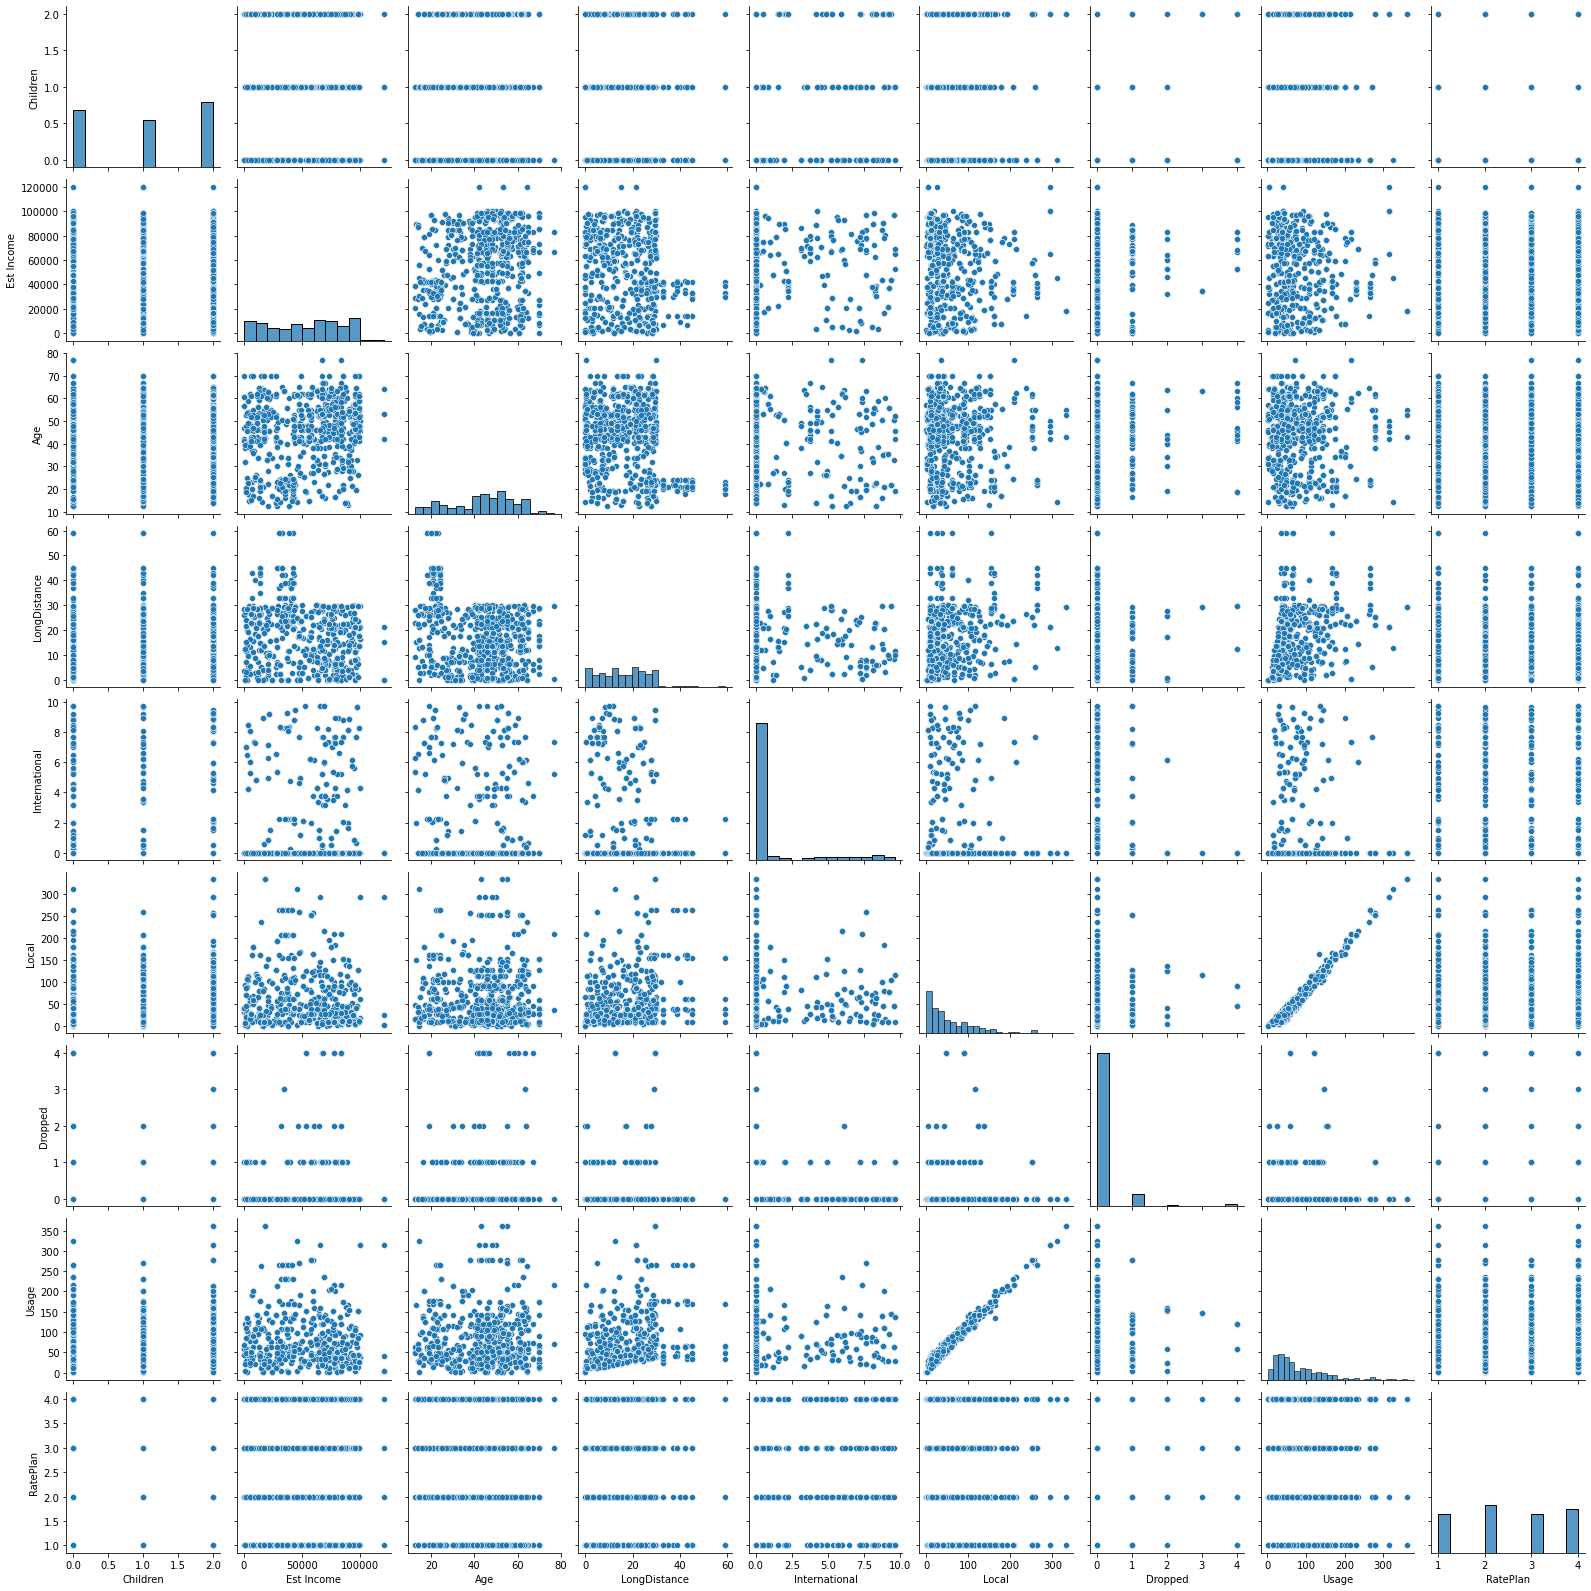

In [32]:
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

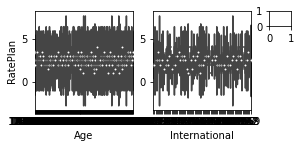

In [33]:

sns.violinplot(x="LongDistance",y="RatePlan",data=df)
plt.subplot(2,3,2)
sns.violinplot(x="International",y="RatePlan",data=df)
plt.subplot(2,4,1)
sns.violinplot(x="Usage",y="RatePlan",data=df)
plt.subplot(2,3,1)
sns.violinplot(x="Age",y="RatePlan",data=df)
plt.subplot(12,13,10)

plt.show()

<AxesSubplot:xlabel='CHURN', ylabel='Children'>

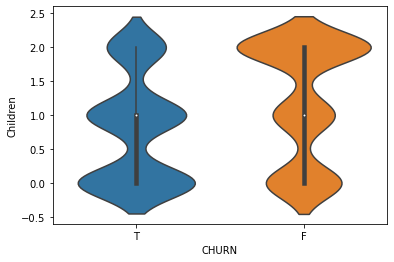

In [34]:
sns.violinplot(x="CHURN", y='Children', data=df)

<AxesSubplot:xlabel='LongDistance', ylabel='RatePlan'>

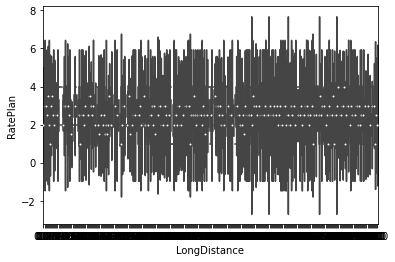

In [35]:
sns.violinplot(x="LongDistance", y='RatePlan', data=df)

In [36]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
x,y

(array([['F', 'S', 1.0, ..., 'Budget', 'Intnl_discount', 229.64],
        ['M', 'M', 2.0, ..., 'FreeLocal', 'Standard', 75.29],
        ['M', 'M', 0.0, ..., 'FreeLocal', 'Standard', 47.25],
        ...,
        ['F', 'M', 2.0, ..., 'Budget', 'Standard', 21.83],
        ['F', 'M', 2.0, ..., 'Budget', 'Intnl_discount', 28.14],
        ['F', 'S', 0.0, ..., 'FreeLocal', 'Standard', 100.28]],
       dtype=object),
 array([3., 2., 3., ..., 2., 3., 3.]))

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [38]:
print("shape for traning data",x_train.shape,y_train.shape)
print("shape for testing data",x_test.shape,y_test.shape)

shape for traning data (961, 14) (961,)
shape for testing data (241, 14) (241,)


<AxesSubplot:xlabel='CHURN', ylabel='Age'>

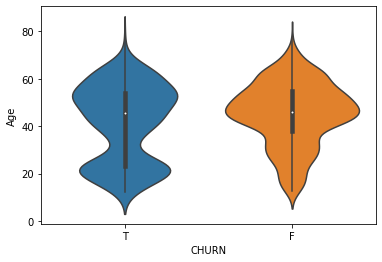

In [39]:
sns.violinplot(x="CHURN", y='Age', data=df)

In [40]:
print(df.dtypes)

CHURN                    object
Gender                   object
Status                   object
Children                float64
Est Income              float64
Car Owner                object
Age                     float64
LongDistance            float64
International           float64
Local                   float64
Dropped                 float64
Paymethod                object
LocalBilltype            object
LongDistanceBilltype     object
Usage                   float64
RatePlan                float64
dtype: object


In [44]:
df.CHURN

0       T
1       F
2       F
3       F
4       F
       ..
2052    F
2053    T
2054    F
2060    F
2065    T
Name: CHURN, Length: 1202, dtype: object

In [45]:
df.Age

0       24.393333
1       49.426667
2       50.673333
3       56.473333
4       25.140000
          ...    
2052    28.000000
2053    54.553333
2054    43.000000
2060    25.140000
2065    15.600000
Name: Age, Length: 1202, dtype: float64

In [46]:
df.Gender

0       F
1       M
2       M
3       M
4       F
       ..
2052    M
2053    M
2054    F
2060    F
2065    F
Name: Gender, Length: 1202, dtype: object

In [48]:
df.Children

0       1.0
1       2.0
2       0.0
3       2.0
4       2.0
       ... 
2052    0.0
2053    0.0
2054    2.0
2060    2.0
2065    0.0
Name: Children, Length: 1202, dtype: float64

In [50]:
df.LongDistance

0       23.56
1       29.78
2       24.81
3       26.13
4        5.03
        ...  
2052     0.87
2053    18.02
2054     8.09
2060     5.03
2065    13.19
Name: LongDistance, Length: 1202, dtype: float64

In [51]:
df.International

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2052    0.0
2053    0.0
2054    0.0
2060    0.0
2065    0.0
Name: International, Length: 1202, dtype: float64

In [52]:
df.Paymethod

0         CC
1         CH
2         CC
3         CC
4         CH
        ... 
2052    Auto
2053      CC
2054      CH
2060      CH
2065      CC
Name: Paymethod, Length: 1202, dtype: object

In [53]:
df.Dropped

0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
2052    0.0
2053    0.0
2054    0.0
2060    0.0
2065    0.0
Name: Dropped, Length: 1202, dtype: float64

In [57]:
df=pd.DataFrame(df.CHURN)

In [59]:
df

,CHURN
0,T
1,F
2,F
3,F
4,F
...,...
2052,F
2053,T
2054,F
2060,F


In [65]:
x =df.iloc[:,0:-1]

In [66]:
x

""
0
1
2
3
4
...
2052
2053
2054
2060


In [67]:
y =df.iloc[:,0:-1]

In [68]:
y

""
0
1
2
3
4
...
2052
2053
2054
2060


In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=45)

In [70]:
 x_train.shape 

(961, 0)

In [71]:
x_test.shape

(241, 0)

In [72]:
y_train.shape

(961, 0)

In [73]:
y_test.shape

(241, 0)

In [74]:
lm=LinearRegression()

In [78]:
from math import pi

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
le = LabelEncoder()
df['CHURN'] = le.fit_transform(df['CHURN'])
df['CHURN'].value_counts()

0    726
1    476
Name: CHURN, dtype: int64

In [81]:
df = pd.get_dummies(df)

In [82]:
df.head()

,CHURN
0,1
1,0
2,0
3,0
4,0


In [83]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (961, 0)
Shape of x_test : (241, 0)
Shape of y_train : (961, 0)
Shape of y_test : (241, 0)
